# Compilado de datos - Pruebas de algortimos
Se necesita compilar en un único dataset los archivos de registros de mediciones. Se parovechó para probar diferentes algoritmos para generar una sequencia de datos regular, que representa los tiempos en que se toman los datos. Se midió el tiempo de ejecución.


In [1]:
# Librerías principales
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

# Manipulación de archivos
import os
import glob

# Pruebas de tiempos de ejecución
import time

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("Pandas",pd.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.23.1
Pandas: 1.4.3
Matplotlib: 3.5.1



## Armado del dataset

In [5]:
# Definición de la ruta
path = './data/record'

In [6]:
# Definición del nombre de columnas
colnames = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

# Armado del dataset
all_files = glob.glob(os.path.join(path, "*.39"))
df_from_each_file = (pd.read_csv(f, sep='\t', names=colnames, header=None, dtype='float32') for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686400 entries, 0 to 3686399
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Bearing 1  float32
 1   Bearing 2  float32
 2   Bearing 3  float32
 3   Bearing 4  float32
dtypes: float32(4)
memory usage: 56.3 MB


## Definición de tiempos de medición
Hay que agregar la columna de tiempos. Antes se crea el array de tres formas distintas. 

In [8]:
# frecuencia de muestreo o "sampling rate" (Hz)
sr = 20e3
# tiempo total de muestreo
tt = np.around(len(df)/sr, decimals=5)

**Método utilizando el método <r_> de numpy**

In [9]:
start = time.time()

time_sample = np.r_[0:tt:1/sr].astype('float32')

elapsed = time.time()-start
print(f'Método np.r_: {elapsed:.4f} segundos')

Método np.r_: 0.0270 segundos


In [10]:
# Verificación del último valor de tiempos
time_sample[-1]

184.31995

**Método empleando un ciclo for convencional**

In [11]:
start = time.time()

i=0
c=0
time_sample_i = np.zeros(len(df), dtype='float32')
for i in range(len(df)):
    time_sample_i[i] = c
    c += 1/sr

elapsed = time.time()-start
print(f'Iteración convencional: {elapsed:.4f} segundos')

Iteración convencional: 1.0652 segundos


In [12]:
# Verificación del último valor de tiempos
time_sample_i[-1]

184.31995

**Método empleando una interación incrustada en el propio array**

In [13]:
start = time.time()

time_sample_r = np.array([i*(1/sr) for i in range(len(df))], dtype='float32')

elapsed = time.time()-start
print(f'Iteración dentro del array: {elapsed:.4f} segundos')

Iteración dentro del array: 0.6633 segundos


In [14]:
# Verificación del último valor de tiempos
time_sample_r[-1]

184.31995

**Inclusión de la columna con tiempos de muestreo**

In [15]:
df['Time'] = time_sample
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686400 entries, 0 to 3686399
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Bearing 1  float32
 1   Bearing 2  float32
 2   Bearing 3  float32
 3   Bearing 4  float32
 4   Time       float32
dtypes: float32(5)
memory usage: 70.3 MB


## Gráficos
Gráfico superpuesto de las vibraciones registradas en cada rodamiento.


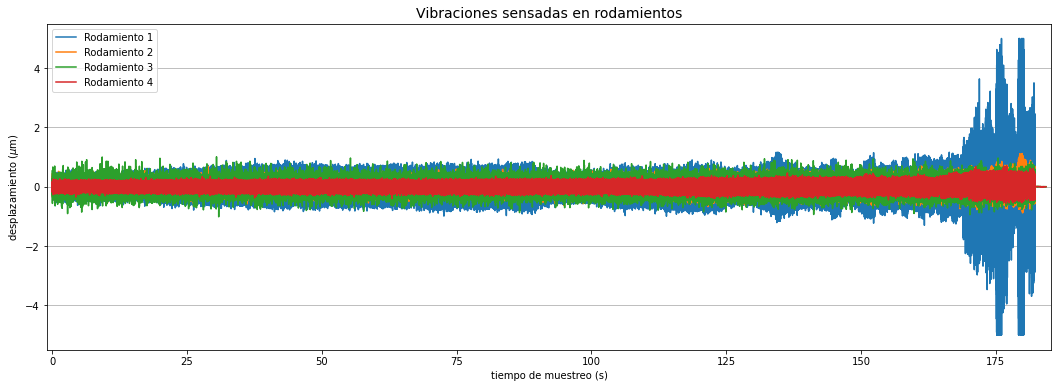

In [17]:
fig = plt.figure(figsize=(18,6))
for i in range(4):
    plt.plot(df['Time'], df.iloc[:,i])
plt.xlim(-1, df['Time'].iloc[-1]+1)
plt.ylabel('desplazamiento ($\mu$m)')
plt.xlabel('tiempo de muestreo (s)')
plt.legend(['Rodamiento 1', 'Rodamiento 2', 'Rodamiento 3', 'Rodamiento 4'])
plt.title('Vibraciones sensadas en rodamientos', fontsize=14)


plt.gca().yaxis.grid(True)
plt.show()